In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.utils import resample

In [2]:
train = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
train[['stroke']].value_counts()

stroke
0         4861
1          249
Name: count, dtype: int64

In [4]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
train.isnull().sum().sort_values(ascending=False)

bmi                  201
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

In [7]:
train.shape

(5110, 12)

In [8]:
train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
train.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [10]:
train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
bins = [0, 2, 12, 18, 35, 50, 65, 100]
labels = ['Infant', 'Child', 'Teenagers', 'Young Adult','Adult', 'Middle Aged', 'Senior']

train['agegroup'] = pd.cut(train['age'], bins=bins, labels=labels, right=False)

In [12]:
train['bmi'] = train['bmi'].fillna(train.groupby(["gender","ever_married","agegroup"])["bmi"].transform('mean'))

C:\Users\admin\AppData\Local\Temp\ipykernel_18680\676207014.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train['bmi'] = train['bmi'].fillna(train.groupby(["gender","ever_married","agegroup"])["bmi"].transform('mean'))


C:\Users\admin\AppData\Local\Temp\ipykernel_18680\251546296.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train,x=col,palette =sns.color_palette("Set2"))
C:\Users\admin\AppData\Local\Temp\ipykernel_18680\251546296.py:4: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.boxplot(data=train,x=col,palette =sns.color_palette("Set2"))


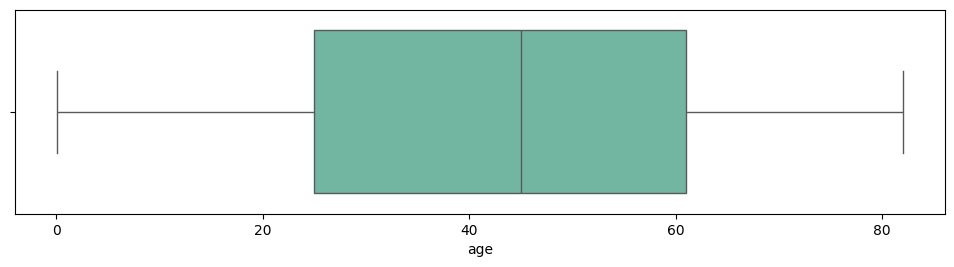

C:\Users\admin\AppData\Local\Temp\ipykernel_18680\251546296.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train,x=col,palette =sns.color_palette("Set2"))
C:\Users\admin\AppData\Local\Temp\ipykernel_18680\251546296.py:4: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.boxplot(data=train,x=col,palette =sns.color_palette("Set2"))


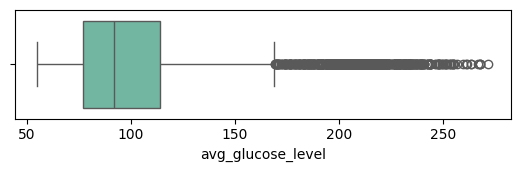

C:\Users\admin\AppData\Local\Temp\ipykernel_18680\251546296.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train,x=col,palette =sns.color_palette("Set2"))
C:\Users\admin\AppData\Local\Temp\ipykernel_18680\251546296.py:4: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.boxplot(data=train,x=col,palette =sns.color_palette("Set2"))


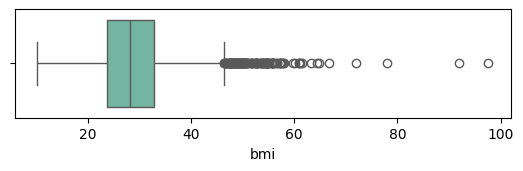

In [13]:
plt.figure(figsize=(12,9))
for i,col in enumerate(train.select_dtypes(float).columns):
    plt.subplot(3,1,i+1)
    sns.boxplot(data=train,x=col,palette =sns.color_palette("Set2"))
    plt.show()

Terdapat beberapa outliers yang harus ditangani

In [14]:
train = train[(train["bmi"]>12) & (train["bmi"]<66)]

In [15]:
train = train[(train["avg_glucose_level"]>56) & (train["avg_glucose_level"]<250)]

menghilangkan outliers di bmi and avg glucose

In [16]:
train = train.drop(index=train[train["gender"]=="Other"].index)

In [17]:
train.shape

(5043, 13)

In [18]:
train = train.drop(columns=['id'])

In [19]:
train[['gender', 'stroke']].groupby('gender', as_index=False).mean()

,gender,stroke
0,Female,0.047361
1,Male,0.049832


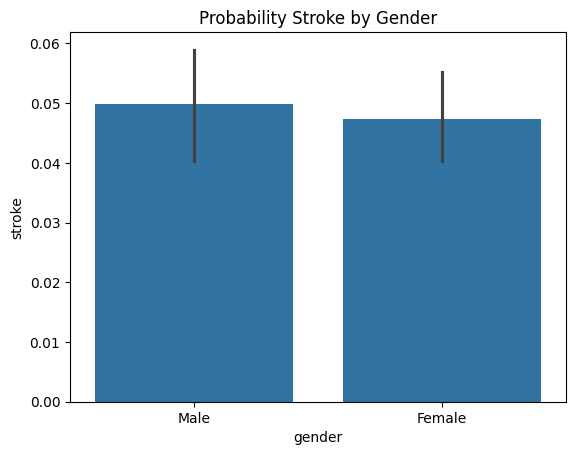

In [20]:
sns.barplot(data=train, x="gender", y='stroke')
plt.title('Probability Stroke by Gender')
plt.show()

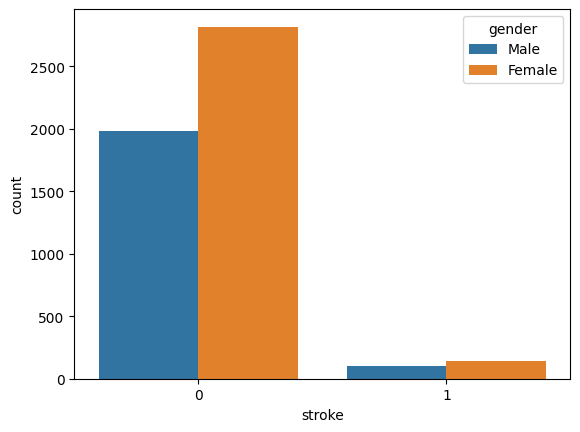

In [21]:
sns.countplot(train,x="stroke",hue="gender")
plt.show()

In [22]:
train[['agegroup', 'stroke']].groupby('agegroup', as_index=False).mean()

C:\Users\admin\AppData\Local\Temp\ipykernel_18680\1358176957.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train[['agegroup', 'stroke']].groupby('agegroup', as_index=False).mean()


,agegroup,stroke
0,Infant,0.008621
1,Child,0.000000
2,Teenagers,0.003236
3,Young Adult,0.001020
4,Adult,0.016315
5,Middle Aged,0.059778
6,Senior,0.153082


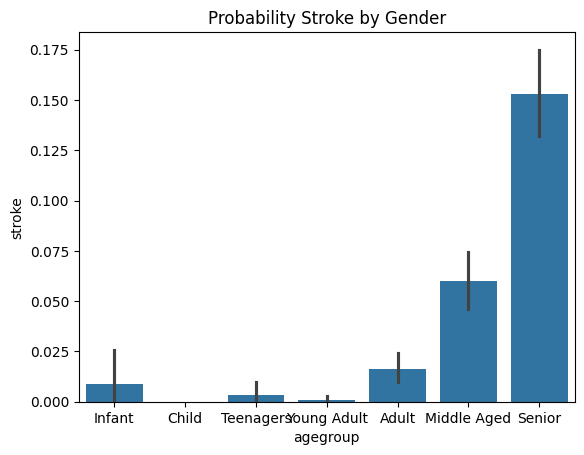

In [23]:
sns.barplot(data=train, x="agegroup", y='stroke')
plt.title('Probability Stroke by Gender')
plt.show()

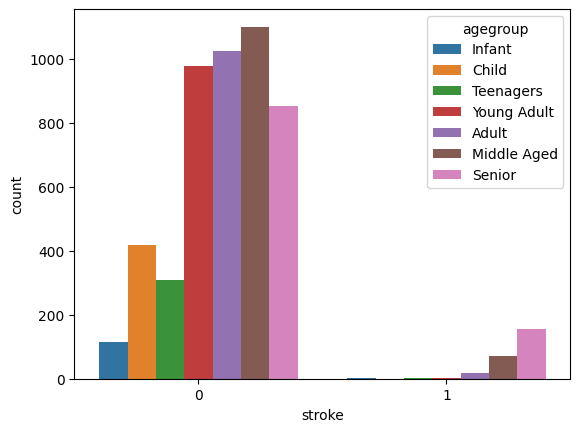

In [24]:
sns.countplot(train,x="stroke",hue="agegroup")
plt.show()

In [25]:
train[['work_type', 'stroke']].groupby('work_type', as_index=False).mean()

,work_type,stroke
0,Govt_job,0.049459
1,Never_worked,0.000000
2,Private,0.050554
3,Self-employed,0.079208
4,children,0.002950


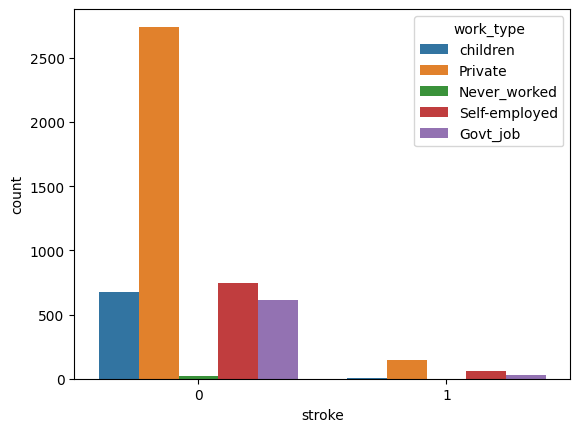

In [26]:
sns.countplot(train,x="stroke",hue="work_type")
plt.show()

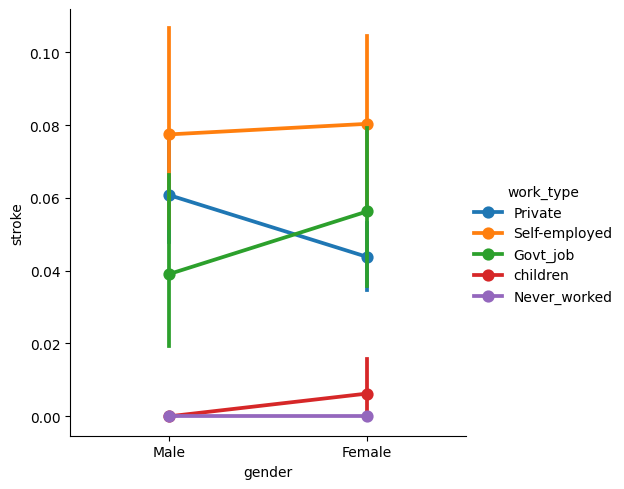

In [27]:
sns.catplot(train, x='gender', y='stroke', hue='work_type', kind='point')

In [28]:
train[['ever_married', 'stroke']].groupby('ever_married', as_index=False).mean()

,ever_married,stroke
0,No,0.016715
1,Yes,0.064994


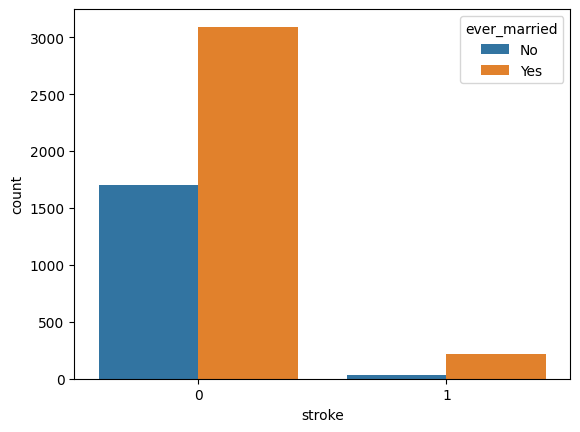

In [29]:
sns.countplot(train,x="stroke",hue="ever_married")
plt.show()

In [30]:
train[['smoking_status', 'stroke']].groupby('smoking_status', as_index=False).mean()

,smoking_status,stroke
0,Unknown,0.030860
1,formerly smoked,0.078857
2,never smoked,0.047619
3,smokes,0.050258


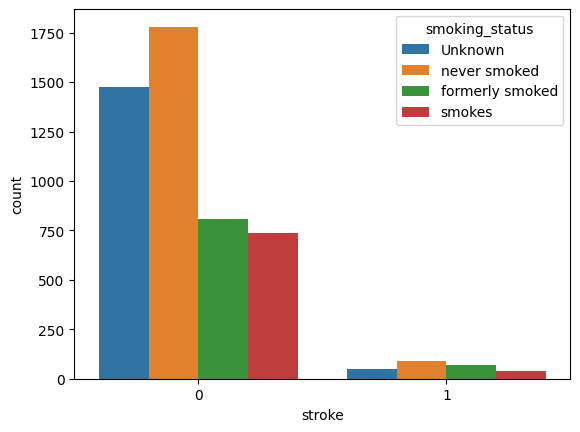

In [31]:
sns.countplot(train,x="stroke",hue="smoking_status")
plt.show()

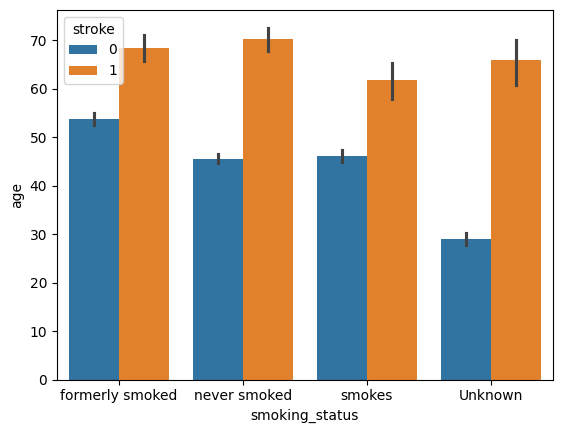

In [32]:
sns.barplot(data=train,x="smoking_status",y="age",hue="stroke")
plt.show()

In [33]:
train[['hypertension', 'stroke']].groupby('hypertension', as_index=False).mean()

,hypertension,stroke
0,0,0.039491
1,1,0.131959


In [34]:
pd.crosstab([train.smoking_status, train.hypertension], train.stroke, margins=True)

stroke                           0    1   All
smoking_status  hypertension                 
Unknown         0             1429   43  1472
                1               47    4    51
formerly smoked 0              707   50   757
                1               99   19   118
never smoked    0             1586   57  1643
                1              194   32   226
smokes          0              656   30   686
                1               81    9    90
All                           4799  244  5043

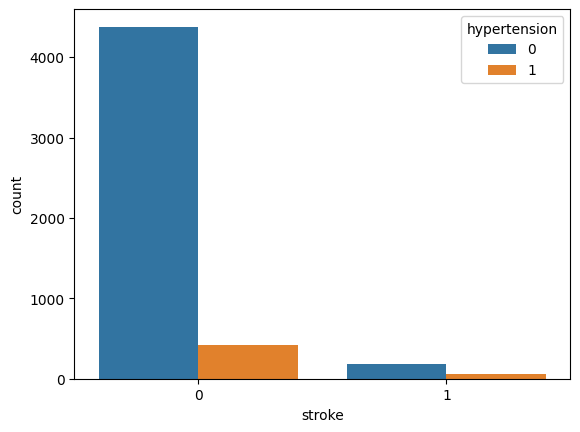

In [35]:
sns.countplot(train,x="stroke",hue="hypertension")
plt.show()

In [36]:
train[['stroke', 'bmi']].groupby('stroke', as_index=False).mean()

,stroke,bmi
0,0,28.811355
1,1,30.358617


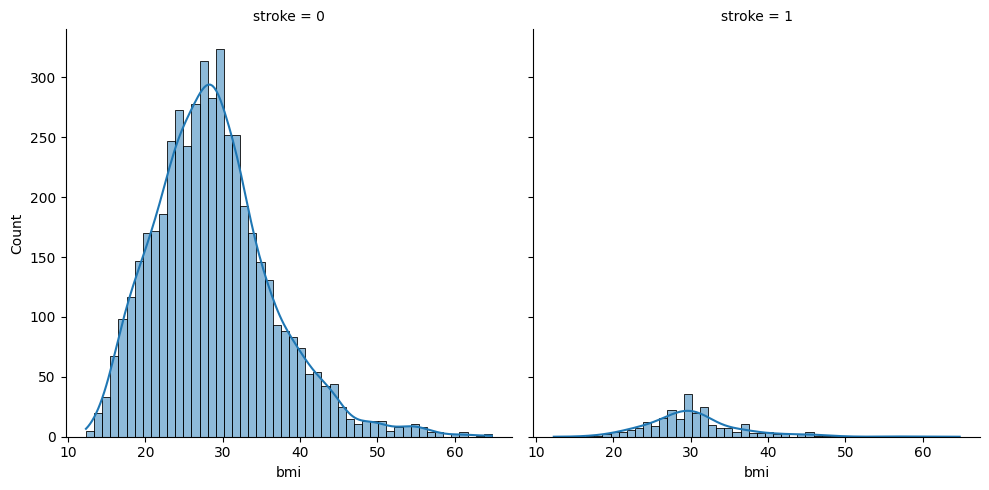

In [37]:
sns.displot(data=train, x='bmi', kde='true', col='stroke')

In [38]:
train[['stroke', 'avg_glucose_level']].groupby('stroke', as_index=False).mean()

,stroke,avg_glucose_level
0,0,104.501211
1,1,129.939918


In [39]:
age = {'Infant' : 0, "Child" : 1, "Teenagers" : 2, "Young Adult" : 3, "Adult" : 4, "Middle Aged": 5, "Senior":6}

train['agegroup'] = train['agegroup'].map(age)

In [40]:
train['agegroup'] = train['agegroup'].astype(int)

In [41]:
encoder  =LabelEncoder()
for col in train.select_dtypes(include="object").columns:
    train[col] =encoder.fit_transform(train[col])

<Axes: >

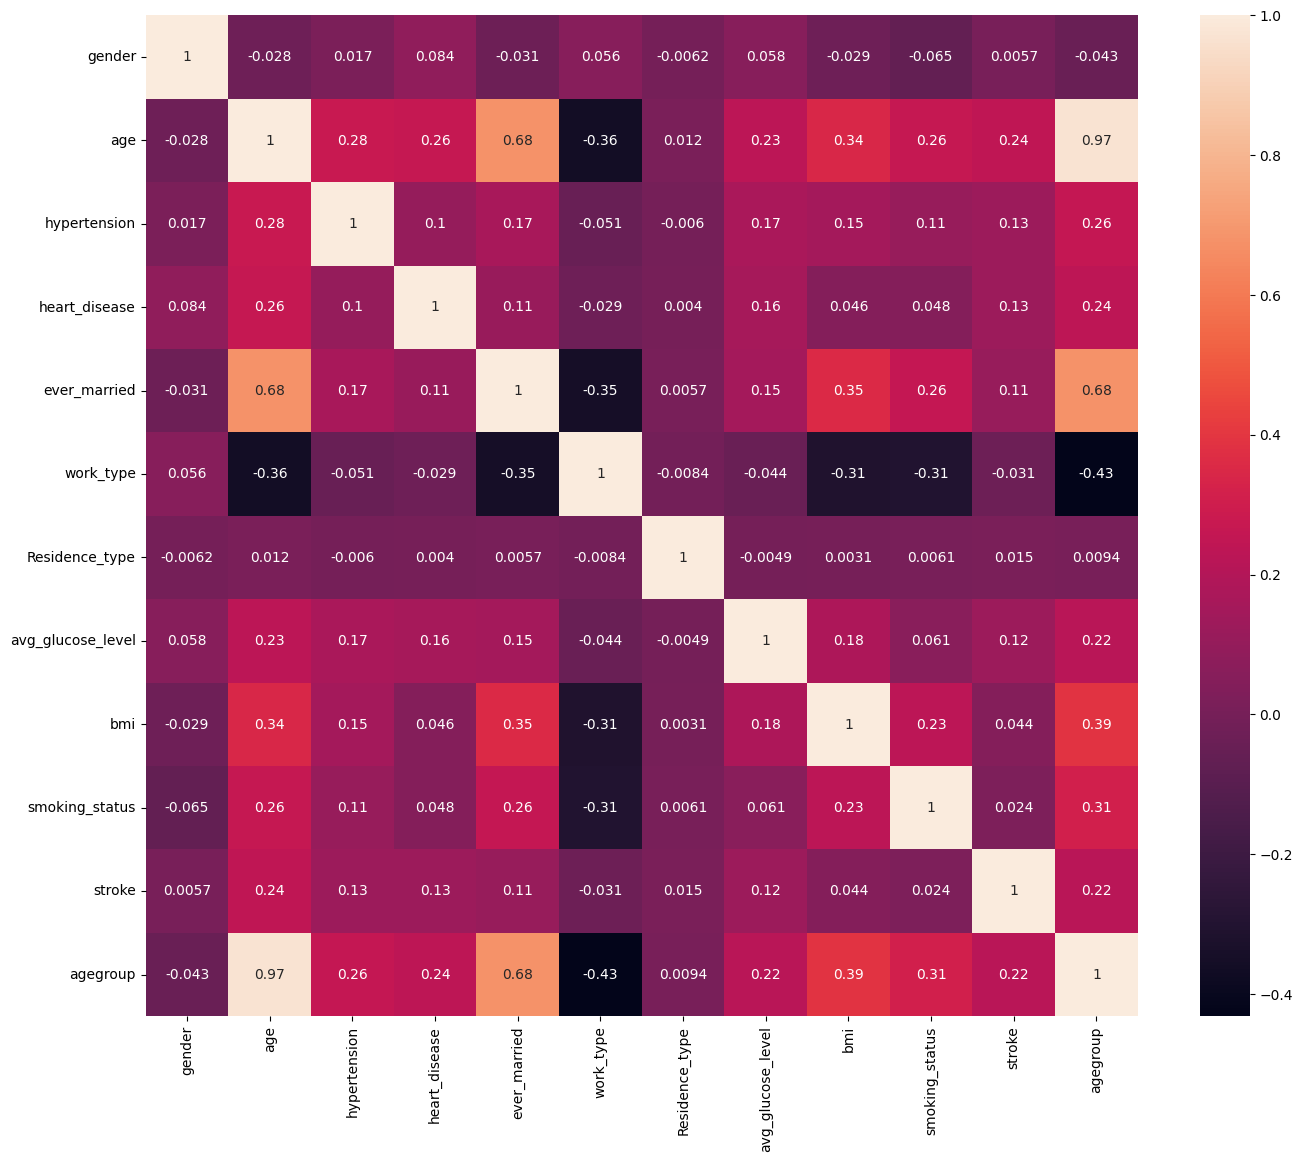

In [42]:
plt.figure(figsize=(16,13))
sns.heatmap(data=train.corr(),annot=True)

In [43]:
X = train.drop(columns="stroke")
y = train["stroke"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [44]:
etc_model = ExtraTreesClassifier()
rfc_model = RandomForestClassifier(n_estimators=29,max_leaf_nodes=900,max_features=0.8,criterion="entropy")
xgb_model = XGBClassifier(objective="binary:logistic",eval_metric = "auc")
gbc_model = GradientBoostingClassifier(max_depth=29,min_samples_leaf=4,min_samples_split=13,subsample=0.8)

models = [etc_model,rfc_model,xgb_model,gbc_model]

In [45]:
for model in models:
    model.fit(X_train,y_train)

In [46]:
for model in models:
    y_predicted = model.predict(X_test)
    model_name = type(model).__name__
    print(f"Report:{model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_predicted)}")
    print(classification_report(y_test,y_predicted))

Report:ExtraTreesClassifier
Accuracy: 0.9454905847373637
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       963
           1       0.15      0.04      0.07        46

    accuracy                           0.95      1009
   macro avg       0.55      0.52      0.52      1009
weighted avg       0.92      0.95      0.93      1009

Report:RandomForestClassifier
Accuracy: 0.9464816650148662
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       963
           1       0.10      0.02      0.04        46

    accuracy                           0.95      1009
   macro avg       0.53      0.51      0.50      1009
weighted avg       0.92      0.95      0.93      1009

Report:XGBClassifier
Accuracy: 0.9504459861248761
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       963
           1       0.33      0.09      0.14        46

    accuracy    

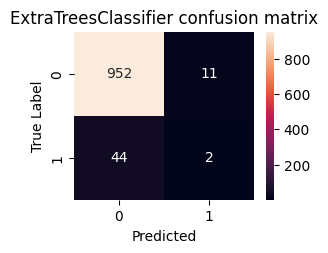

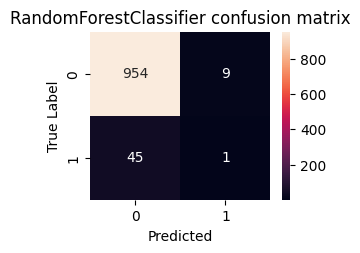

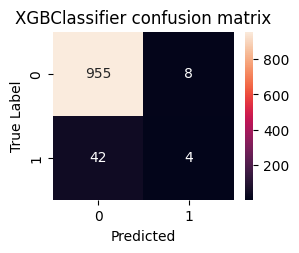

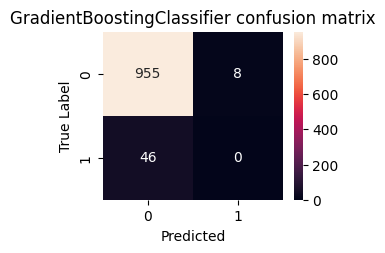

In [47]:
for i,model in enumerate(models):
    plt.subplot(2,2,i+1)
    y_predicted = model.predict(X_test)
    model_name = type(model).__name__
    cm = confusion_matrix(y_test, y_predicted)
    sns.heatmap(cm, annot=True,fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True Label')
    plt.title(f"{model_name} confusion matrix")
    plt.show()

In [48]:
import joblib

joblib.dump(etc_model, "etc_model.joblib")
joblib.dump(rfc_model, "rfc_model.joblib")
joblib.dump(xgb_model, "xgb_model.joblib")
joblib.dump(gbc_model, "gbc_model.joblib")

['gbc_model.joblib']

In [49]:
etc_models = joblib.load('etc_model.joblib')

rfc_models = joblib.load('rfc_model.joblib')

xgb_models = joblib.load('xgb_model.joblib')

gbc_models = joblib.load('gbc_model.joblib')